In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestClassifier, GradientBoostingClassifier  
from sklearn.linear_model import LassoCV 
from sklearn import svm
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

sns.set()


In [ ]:
Data preparation

In [2]:
df = pd.read_csv('C:/Users/Μαριάνθη/Documents/GitHub/JAN23_BDS_INT-Rakuten/data/mars-2014-complete.csv', sep=';', on_bad_lines="warn", encoding='iso-8859-1') 


In [3]:
df.head()

,lib_mrq,lib_mod_doss,lib_mod,dscom,cnit,tvv,cod_cbr,hybride,puiss_admin_98,puiss_max,...,masse_ordma_min,masse_ordma_max,champ_v9,date_maj,Carrosserie,gamme,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


In [4]:
# Renaming the column names into English 
df.rename(columns={
        "lib_mrq": "Brand",
        "lib_mod_doss": "Model",
        "lib_mod": "Commercial_Model",
        "dscom": "Commercial_Designation",
        "cnit": "National_Identification_Code_(CNIT)",
        "tvv": "Type_Variant_Version_(TVV)",
        "cod_cbr": "Fuel_Type",
        "hybride": "Hybrid",
        "puiss_admin_98": "Administrative_Power",
        "puiss_max": "Maximum_Power_(in_kW)",
        "typ_boite_nb_rapp": "Gearbox_Type_and_Number_of_Gears",
        "conso_urb": "Urban_Fuel_Consumption_(in_l/100km)",
        "conso_exurb": "Extra-urban_Fuel_Consumption_(in_l/100km)",
        "conso_mixte": "Mixed_Fuel_Consumption_(in_l/100km)",
        "co2": "CO2_Emissions_(in_g/km)",
        "co_typ_1": "CO_Type_I_Test_Result",
        "hc": "HC_Test_Result",
        "nox": "NOx_Test_Result",
        "hcnox": "HC+NOx_Test_Result",
        "ptcl": "Particle_Test_Result",
        "masse_ordma_min": "Minimum_Kerb_Weight",
        "masse_ordma_max": "Maximum_Kerb_Weight",
        "champ_v9": "EURO_Norm_Field_(in_the_Registration_Certificate)",
        "date_maj": "Date_of_Last_Update",
        "Carrosserie": "Body_Type",
        "gamme": "Range"
    }, inplace=True)


In [5]:
df.head()

,Brand,Model,Commercial_Model,Commercial_Designation,National_Identification_Code_(CNIT),Type_Variant_Version_(TVV),Fuel_Type,Hybrid,Administrative_Power,Maximum_Power_(in_kW),...,Minimum_Kerb_Weight,Maximum_Kerb_Weight,EURO_Norm_Field_(in_the_Registration_Certificate),Date_of_Last_Update,Body_Type,Range,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER,NaN,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55044 entries, 0 to 55043
Data columns (total 30 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Brand                                              55044 non-null  object 
 1   Model                                              55044 non-null  object 
 2   Commercial_Model                                   55044 non-null  object 
 3   Commercial_Designation                             55044 non-null  object 
 4   National_Identification_Code_(CNIT)                55044 non-null  object 
 5   Type_Variant_Version_(TVV)                         55044 non-null  object 
 6   Fuel_Type                                          55044 non-null  object 
 7   Hybrid                                             55044 non-null  object 
 8   Administrative_Power                               55044 non-null  int64  
 9   Maximu

In [7]:
#Deleting the last 4 columns since they contains only NaNs  
df = df.drop(['Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'], axis=1)

In [8]:
df.head()

,Brand,Model,Commercial_Model,Commercial_Designation,National_Identification_Code_(CNIT),Type_Variant_Version_(TVV),Fuel_Type,Hybrid,Administrative_Power,Maximum_Power_(in_kW),...,HC_Test_Result,NOx_Test_Result,HC+NOx_Test_Result,Particle_Test_Result,Minimum_Kerb_Weight,Maximum_Kerb_Weight,EURO_Norm_Field_(in_the_Registration_Certificate),Date_of_Last_Update,Body_Type,Range
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000G340,939AXN1B52C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),M10ALFVP000H341,939BXN1B53C,ES,non,12,147,...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000E302,939AXR1B64,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),M10ALFVP000F303,939AXR1B64B,GO,non,7,100,...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),M10ALFVP000G304,939AXS1B66,GO,non,9,125,...,NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


In [9]:
#The columns of the National Type Identification Code (CNIT) and the column of the Type-Variante-Version (TVV) or the type Mines are like IDs, 
#so they are not useful. 
df = df.drop(['National_Identification_Code_(CNIT)', 'Type_Variant_Version_(TVV)'], axis=1)

In [10]:
df.head()

,Brand,Model,Commercial_Model,Commercial_Designation,Fuel_Type,Hybrid,Administrative_Power,Maximum_Power_(in_kW),Gearbox_Type_and_Number_of_Gears,Urban_Fuel_Consumption_(in_l/100km),...,HC_Test_Result,NOx_Test_Result,HC+NOx_Test_Result,Particle_Test_Result,Minimum_Kerb_Weight,Maximum_Kerb_Weight,EURO_Norm_Field_(in_the_Registration_Certificate),Date_of_Last_Update,Body_Type,Range
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,"11,30000019",...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,"11,5",...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100,M 6,"6,599999905",...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
3,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100,M 6,"6,599999905",...,NaN,"0,149000004","0,174999997","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125,M 6,"6,900000095",...,NaN,"0,164000005","0,193000004","0,001",1565,1565,715/2007*692/2008EURO5,mars-14,BERLINE,MOY-SUPER


In [11]:
df['EURO_Norm_Field_(in_the_Registration_Certificate)'] = df['EURO_Norm_Field_(in_the_Registration_Certificate)'].str[-5:]

In [12]:
#Deleting the duplicated values, keeping the first one. 
df = df.drop_duplicates(keep='first')

In [13]:
df.head()

,Brand,Model,Commercial_Model,Commercial_Designation,Fuel_Type,Hybrid,Administrative_Power,Maximum_Power_(in_kW),Gearbox_Type_and_Number_of_Gears,Urban_Fuel_Consumption_(in_l/100km),...,HC_Test_Result,NOx_Test_Result,HC+NOx_Test_Result,Particle_Test_Result,Minimum_Kerb_Weight,Maximum_Kerb_Weight,EURO_Norm_Field_(in_the_Registration_Certificate),Date_of_Last_Update,Body_Type,Range
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,"11,30000019",...,"0,052000001","0,032000002",NaN,"0,002",1505,1505,EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,"11,5",...,"0,052000001","0,032000002",NaN,"0,002",1555,1555,EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100,M 6,"6,599999905",...,NaN,"0,149000004","0,174999997","0,001",1565,1565,EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125,M 6,"6,900000095",...,NaN,"0,164000005","0,193000004","0,001",1565,1565,EURO5,mars-14,BERLINE,MOY-SUPER
6,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,GO,non,9,125,M 6,"6,599999905",...,NaN,"0,169","0,189999998","0,003",1565,1565,EURO5,mars-14,BERLINE,MOY-SUPER


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 55043
Data columns (total 24 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Brand                                              8400 non-null   object 
 1   Model                                              8400 non-null   object 
 2   Commercial_Model                                   8400 non-null   object 
 3   Commercial_Designation                             8400 non-null   object 
 4   Fuel_Type                                          8400 non-null   object 
 5   Hybrid                                             8400 non-null   object 
 6   Administrative_Power                               8400 non-null   int64  
 7   Maximum_Power_(in_kW)                              8400 non-null   object 
 8   Gearbox_Type_and_Number_of_Gears                   8400 non-null   object 
 9   Urban_F

In [15]:
#The columns are decimal numbers but since they have a comma (,) instead of a dot (.), they are considered as object. 
#So we replace at these columns the comma by a dot and change the type into float. 
 
df['Urban_Fuel_Consumption_(in_l/100km)'] = df['Urban_Fuel_Consumption_(in_l/100km)'].str.replace(',', '.').astype(float)

df['Extra-urban_Fuel_Consumption_(in_l/100km)'] = df['Extra-urban_Fuel_Consumption_(in_l/100km)'].str.replace(',', '.').astype(float)

df['Mixed_Fuel_Consumption_(in_l/100km)'] = df['Mixed_Fuel_Consumption_(in_l/100km)'].str.replace(',', '.').astype(float)

df['CO_Type_I_Test_Result'] = df['CO_Type_I_Test_Result'].str.replace(',', '.').astype(float)

df['HC_Test_Result'] = df['HC_Test_Result'].str.replace(',', '.').astype(float)

df['NOx_Test_Result'] = df['NOx_Test_Result'].str.replace(',', '.').astype(float)

df['HC+NOx_Test_Result'] = df['HC+NOx_Test_Result'].str.replace(',', '.').astype(float)

df['Particle_Test_Result'] = df['Particle_Test_Result'].str.replace(',', '.').astype(float)



In [16]:
df.head()

,Brand,Model,Commercial_Model,Commercial_Designation,Fuel_Type,Hybrid,Administrative_Power,Maximum_Power_(in_kW),Gearbox_Type_and_Number_of_Gears,Urban_Fuel_Consumption_(in_l/100km),...,HC_Test_Result,NOx_Test_Result,HC+NOx_Test_Result,Particle_Test_Result,Minimum_Kerb_Weight,Maximum_Kerb_Weight,EURO_Norm_Field_(in_the_Registration_Certificate),Date_of_Last_Update,Body_Type,Range
0,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,11.3,...,0.052,0.032,NaN,0.002,1505,1505,EURO5,mars-14,BERLINE,MOY-SUPER
1,ALFA-ROMEO,159,159,159 1750 Tbi (200ch),ES,non,12,147,M 6,11.5,...,0.052,0.032,NaN,0.002,1555,1555,EURO5,mars-14,BERLINE,MOY-SUPER
2,ALFA-ROMEO,159,159,159 2.0 JTDm (136ch),GO,non,7,100,M 6,6.6,...,NaN,0.149,0.175,0.001,1565,1565,EURO5,mars-14,BERLINE,MOY-SUPER
4,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch),GO,non,9,125,M 6,6.9,...,NaN,0.164,0.193,0.001,1565,1565,EURO5,mars-14,BERLINE,MOY-SUPER
6,ALFA-ROMEO,159,159,159 2.0 JTDm (170ch) ECO,GO,non,9,125,M 6,6.6,...,NaN,0.169,0.190,0.003,1565,1565,EURO5,mars-14,BERLINE,MOY-SUPER


In [17]:
df.isnull().sum(axis=0)

Brand                                                   0
Model                                                   0
Commercial_Model                                        0
Commercial_Designation                                  0
Fuel_Type                                               0
Hybrid                                                  0
Administrative_Power                                    0
Maximum_Power_(in_kW)                                   0
Gearbox_Type_and_Number_of_Gears                        0
Urban_Fuel_Consumption_(in_l/100km)                    34
Extra-urban_Fuel_Consumption_(in_l/100km)              34
Mixed_Fuel_Consumption_(in_l/100km)                    25
CO2_Emissions_(in_g/km)                                25
CO_Type_I_Test_Result                                  91
HC_Test_Result                                       5001
NOx_Test_Result                                        91
HC+NOx_Test_Result                                   3460
Particle_Test_

In [18]:
#We can delete the column Date_of_Last_Update, since it contains many NaNs and this is not a usefull variable. 

df = df.drop(['Date_of_Last_Update'], axis=1)

In [19]:
#We can replace the missing values with a statistic, for example with the mean of the corresponding column. 
df = df.fillna(df.mean())

C:\Users\Μαριάνθη\AppData\Local\Temp\ipykernel_17116\2067382829.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8400 entries, 0 to 55043
Data columns (total 23 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Brand                                              8400 non-null   object 
 1   Model                                              8400 non-null   object 
 2   Commercial_Model                                   8400 non-null   object 
 3   Commercial_Designation                             8400 non-null   object 
 4   Fuel_Type                                          8400 non-null   object 
 5   Hybrid                                             8400 non-null   object 
 6   Administrative_Power                               8400 non-null   int64  
 7   Maximum_Power_(in_kW)                              8400 non-null   object 
 8   Gearbox_Type_and_Number_of_Gears                   8400 non-null   object 
 9   Urban_F

In [ ]:
Data exploration

<AxesSubplot:xlabel='CO2_Emissions_(in_g/km)', ylabel='Count'>

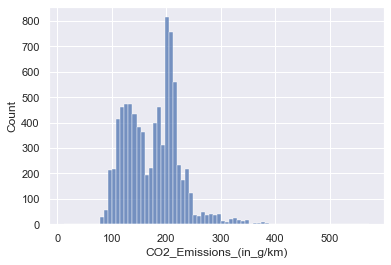

In [21]:
#Plottig a histogram for the variable co2 

sns.histplot(data=df, x="CO2_Emissions_(in_g/km)")

In [22]:
print("Only few cars produce very low and very large level of CO2. The most cars produce CO2 of level between about 100 and 200.") 

Only few cars produce very low and very large level of CO2. The most cars produce CO2 of level between about 100 and 200.


In [23]:
#Description of the co2 column, i.e. we get a descriptive statistics summary of this column. 
# (This includes mean, count, std deviation, percentiles, and min-max values.)  
df['CO2_Emissions_(in_g/km)'].describe()

count    8400.000000
mean      175.685612
std        49.651853
min        13.000000
25%       134.000000
50%       181.000000
75%       209.000000
max       572.000000
Name: CO2_Emissions_(in_g/km), dtype: float64

In [24]:
print("From the information provided, we can see that the range of the target variable co2 is quite large,\n" 
    "with a minimum value of 13 and a maximum value of 572. The standard deviation is also relatively large compared to\n" 
    "the mean, which suggests that the data may be somewhat spread out.\n"
    "In general, standardization can be helpful when the scale of the features varies widely, especially when using\n" 
    "algorithms that are sensitive to the relative scales of the features, such as distance-based methods.")



From the information provided, we can see that the range of the target variable co2 is quite large,
with a minimum value of 13 and a maximum value of 572. The standard deviation is also relatively large compared to
the mean, which suggests that the data may be somewhat spread out.
In general, standardization can be helpful when the scale of the features varies widely, especially when using
algorithms that are sensitive to the relative scales of the features, such as distance-based methods.


In [ ]:
--Categorical features

In [25]:
#The types of fuel available  
df['Fuel_Type'].value_counts()

GO       5889
ES       2271
EH         90
EL         25
GH         25
ES/GP      19
GP/ES      19
ES/GN      17
GN/ES      17
GN         11
EE          9
FE          7
GL          1
Name: Fuel_Type, dtype: int64

In [ ]:
# E: Electricity
# G: Natural Gas/Diesel
# H: Hydrogen
# L: LPG (Liquefied Petroleum Gas)
# P: Petrol (Gasoline)
# N: Other fuel types not specified above, such as biofuels

# For example, "ES" represents a vehicle that is powered by electricity, while "GP/ES" represents a vehicle that can 
# be powered by both natural gas and electricity.

Text(0.5, 1.0, 'CO2 emissions by type of fuel')

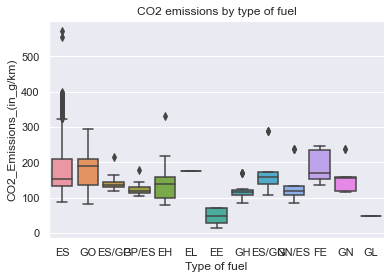

In [26]:
sns.boxplot(data=df, x="Fuel_Type", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Type of fuel")
plt.title("CO2 emissions by type of fuel")


In [ ]:
# Regarding the comparison of CO2 emissions between different fuel types, the boxplot shows that diesel (GO) 
# has a higher median and a wider range of CO2 emissions compared to gasoline (ES) and other fuel types.

In [27]:
#The vehicle brand available. 
df['Brand'].value_counts()

MERCEDES        2635
VOLKSWAGEN      1585
BMW              463
FIAT             359
AUDI             349
FORD             298
OPEL             280
CITROEN          217
NISSAN           202
PEUGEOT          173
RENAULT          145
TOYOTA           140
SKODA            131
PORSCHE          109
VOLVO            108
SEAT             104
MINI              97
ALFA-ROMEO        80
LEXUS             77
LAND ROVER        74
CHEVROLET         67
KIA               66
HONDA             52
HYUNDAI           50
JEEP              50
MITSUBISHI        43
MAZDA             41
JAGUAR            39
CADILLAC          38
LANCIA            38
ASTON MARTIN      37
SMART             35
SUZUKI            29
DACIA             27
FERRARI           24
SUBARU            23
LAMBORGHINI       21
MASERATI          19
INFINITI          16
LOTUS             14
BENTLEY           13
ROLLS-ROYCE       10
MIA                9
SSANGYONG          6
LADA               6
TESLA              1
Name: Brand, dtype: int64

Text(0.5, 1.0, 'CO2 emissions by vehicle models')

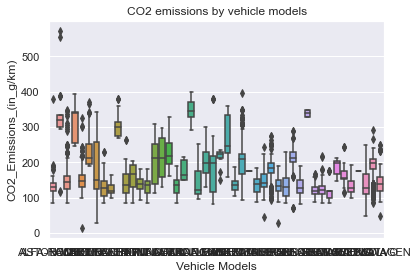

In [28]:
sns.boxplot(data=df, x="Brand", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Vehicle Models")
plt.title("CO2 emissions by vehicle models")

In [29]:
#The types of engine available (hybrid vehicle or non-hybrid). 
df['Hybrid'].value_counts()

non    8275
oui     125
Name: Hybrid, dtype: int64

Text(0.5, 1.0, 'CO2 emissions by type of engine')

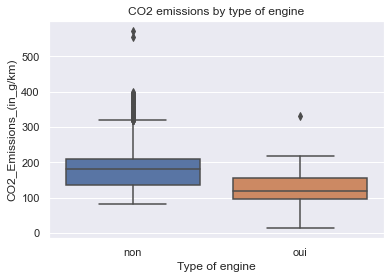

In [30]:
sns.boxplot(data=df, x="Hybrid", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Type of engine")
plt.title("CO2 emissions by type of engine")

In [31]:
#The types of transmission, i.e. the types of gearbox and the number of gears. 
df['Gearbox_Type_and_Number_of_Gears'].value_counts()

M 6    4176
A 7    1480
M 5     733
A 6     663
A 5     557
A 8     467
V 0     159
D 5      58
D 7      24
A 4      22
M 7      20
A 9      15
D 6      12
A 0       6
A 1       2
N 0       2
V .       2
S 6       1
N 1       1
Name: Gearbox_Type_and_Number_of_Gears, dtype: int64

In [ ]:
# M: Manual transmission
# A: Automatic transmission
# V: Continuously variable transmission (CVT)
# D: Dual clutch transmission (DCT)
# S: Sequential gearbox
# N: Not specified 

# The number after the letter indicates the number of gears the transmission has. For example, "M 6" means a manual 
# transmission with six gears, and "A 7" means an automatic transmission with seven gears. The dot (".") and the zero 
# ("0") after the letter "V" and "N" respectively indicate that the number of gears is not specified.

Text(0.5, 1.0, 'CO2 emissions by type of transmission')

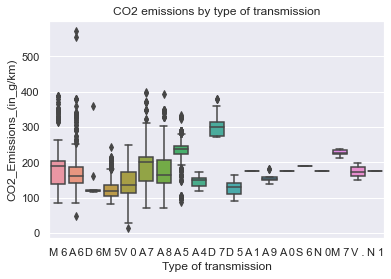

In [32]:
sns.boxplot(data=df, x="Gearbox_Type_and_Number_of_Gears", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Type of transmission")
plt.title("CO2 emissions by type of transmission")

In [33]:
#Field V9 of the registration certificate which contains the EURO standard. 
df['EURO_Norm_Field_(in_the_Registration_Certificate)'].value_counts()

EURO5    6751
EURO6    1189
74EEV     399
2EURO       8
95/20       5
007*1       3
13EUR       2
2007*       2
30/20       2
15/20       2
013EU       1
5/201       1
/2013       1
012EU       1
Name: EURO_Norm_Field_(in_the_Registration_Certificate), dtype: int64

Text(0.5, 1.0, 'CO2 emissions by certificate')

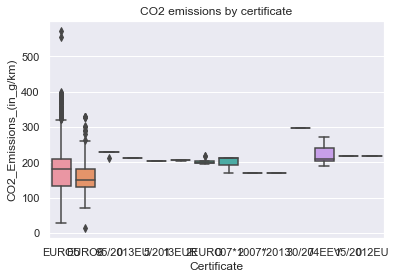

In [34]:
sns.boxplot(data=df, x="EURO_Norm_Field_(in_the_Registration_Certificate)", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Certificate")
plt.title("CO2 emissions by certificate")

In [35]:
#Vehicle Bodies. 
df['Body_Type'].value_counts()

MINIBUS                3518
BERLINE                2115
TS TERRAINS/CHEMINS     712
BREAK                   688
COUPE                   459
CABRIOLET               315
COMBISPACE              224
MONOSPACE COMPACT       189
MINISPACE               117
MONOSPACE                59
COMBISPCACE               4
Name: Body_Type, dtype: int64

In [36]:
#At COMBISPCACE there is a typo, it should be COMBISPACE, so we should rename it. 
df = df.replace('COMBISPCACE', 'COMBISPACE')

In [37]:
df['Body_Type'].value_counts()

MINIBUS                3518
BERLINE                2115
TS TERRAINS/CHEMINS     712
BREAK                   688
COUPE                   459
CABRIOLET               315
COMBISPACE              228
MONOSPACE COMPACT       189
MINISPACE               117
MONOSPACE                59
Name: Body_Type, dtype: int64

Text(0.5, 1.0, 'CO2 emissions by type of vehicle body')

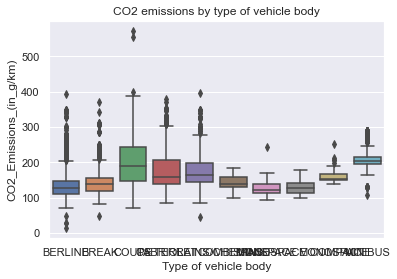

In [38]:
sns.boxplot(data=df, x="Body_Type", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Type of vehicle body")
plt.title("CO2 emissions by type of vehicle body")

In [39]:
#Range/Class. 
df['Range'].value_counts()

MOY-INFER         4337
LUXE              1189
MOY-SUPER         1045
INFERIEURE         885
SUPERIEURE         688
ECONOMIQUE         200
MOY-INFERIEURE      56
Name: Range, dtype: int64

Text(0.5, 1.0, 'CO2 emissions by type of vehicle class')

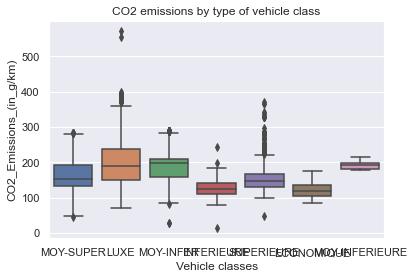

In [40]:
sns.boxplot(data=df, x="Range", y="CO2_Emissions_(in_g/km)")
plt.xlabel("Vehicle classes")
plt.title("CO2 emissions by type of vehicle class")

In [ ]:
--Numerical features 

In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64'] 
df_num = df.select_dtypes(include=numerics)

In [42]:
df_num.corr()

,Administrative_Power,Urban_Fuel_Consumption_(in_l/100km),Extra-urban_Fuel_Consumption_(in_l/100km),Mixed_Fuel_Consumption_(in_l/100km),CO2_Emissions_(in_g/km),CO_Type_I_Test_Result,HC_Test_Result,NOx_Test_Result,HC+NOx_Test_Result,Particle_Test_Result,Minimum_Kerb_Weight,Maximum_Kerb_Weight
Administrative_Power,1.000000,0.772914,0.572009,0.697737,0.615700,0.154736,0.163792,-0.081922,-0.001095,0.084910,0.199105,0.101017
Urban_Fuel_Consumption_(in_l/100km),0.772914,1.000000,0.884148,0.972135,0.913769,0.095708,0.023708,0.148061,0.333972,0.266628,0.461982,0.393899
Extra-urban_Fuel_Consumption_(in_l/100km),0.572009,0.884148,1.000000,0.961793,0.972518,-0.020989,-0.148872,0.317107,0.492657,0.339939,0.713609,0.699984
Mixed_Fuel_Consumption_(in_l/100km),0.697737,0.972135,0.961793,1.000000,0.973065,0.043754,-0.053886,0.235436,0.418434,0.310130,0.594528,0.549316
CO2_Emissions_(in_g/km),0.615700,0.913769,0.972518,0.973065,1.000000,-0.051518,-0.169101,0.329453,0.453837,0.318742,0.715229,0.678825
CO_Type_I_Test_Result,0.154736,0.095708,-0.020989,0.043754,-0.051518,1.000000,0.432597,-0.384066,0.177066,-0.083323,-0.319400,-0.259553
HC_Test_Result,0.163792,0.023708,-0.148872,-0.053886,-0.169101,0.432597,1.000000,-0.599654,0.000153,-0.288635,-0.473822,-0.472816
NOx_Test_Result,-0.081922,0.148061,0.317107,0.235436,0.329453,-0.384066,-0.599654,1.000000,0.082637,0.652917,0.595420,0.556744
HC+NOx_Test_Result,-0.001095,0.333972,0.492657,0.418434,0.453837,0.177066,0.000153,0.082637,1.000000,0.156977,0.376906,0.460471
Particle_Test_Result,0.084910,0.266628,0.339939,0.310130,0.318742,-0.083323,-0.288635,0.652917,0.156977,1.000000,0.363044,0.337459


In [43]:
#The columns CO_Type_I_Test_Result, HC_Test_Result, NOx_Test_Result, HC+NOx_Test_Result, Particle_Test_Result are not 
#so relevant for the emission of CO2, so these columns can be deleted. 

df = df.drop(['CO_Type_I_Test_Result', 'HC_Test_Result', 'NOx_Test_Result', 'HC+NOx_Test_Result', 'Particle_Test_Result'], 
             axis=1)

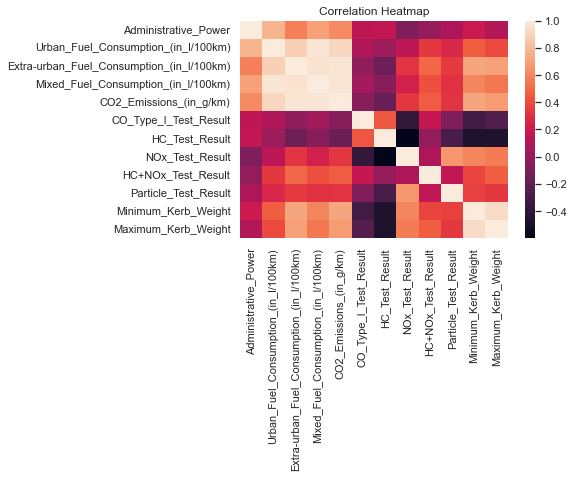

In [44]:
sns.heatmap(df_num.corr()) 
plt.title('Correlation Heatmap')
plt.show()

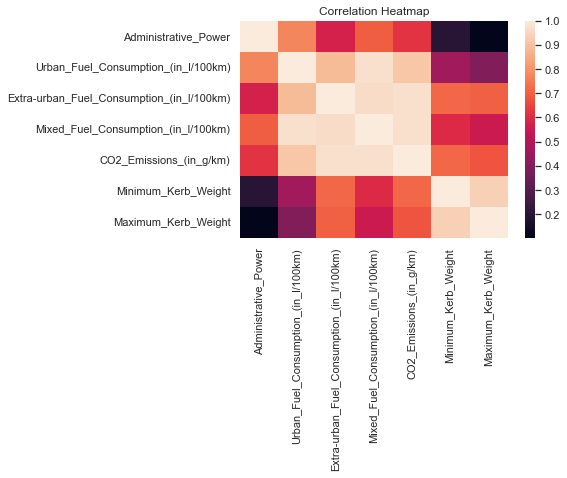

In [45]:
sns.heatmap(df.corr()) 
plt.title('Correlation Heatmap')
plt.show()

In [46]:
df.corr()

,Administrative_Power,Urban_Fuel_Consumption_(in_l/100km),Extra-urban_Fuel_Consumption_(in_l/100km),Mixed_Fuel_Consumption_(in_l/100km),CO2_Emissions_(in_g/km),Minimum_Kerb_Weight,Maximum_Kerb_Weight
Administrative_Power,1.000000,0.772914,0.572009,0.697737,0.615700,0.199105,0.101017
Urban_Fuel_Consumption_(in_l/100km),0.772914,1.000000,0.884148,0.972135,0.913769,0.461982,0.393899
Extra-urban_Fuel_Consumption_(in_l/100km),0.572009,0.884148,1.000000,0.961793,0.972518,0.713609,0.699984
Mixed_Fuel_Consumption_(in_l/100km),0.697737,0.972135,0.961793,1.000000,0.973065,0.594528,0.549316
CO2_Emissions_(in_g/km),0.615700,0.913769,0.972518,0.973065,1.000000,0.715229,0.678825
Minimum_Kerb_Weight,0.199105,0.461982,0.713609,0.594528,0.715229,1.000000,0.936745
Maximum_Kerb_Weight,0.101017,0.393899,0.699984,0.549316,0.678825,0.936745,1.000000


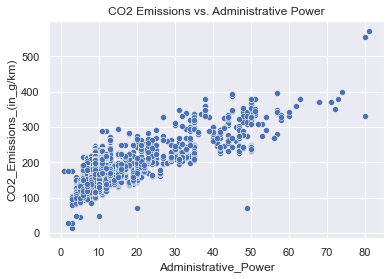

In [47]:
sns.scatterplot(data=df, x='Administrative_Power', y='CO2_Emissions_(in_g/km)')
plt.title('CO2 Emissions vs. Administrative Power')
plt.show()

Text(0.5, 1.0, 'Administrative power and CO2 emissions by engine type')

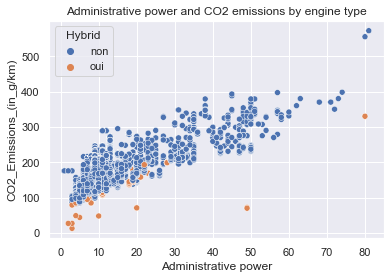

In [48]:
sns.scatterplot(x = 'Administrative_Power', y = 'CO2_Emissions_(in_g/km)', hue = 'Hybrid', data = df) 
plt.xlabel("Administrative power")
plt.title("Administrative power and CO2 emissions by engine type")

Text(0.5, 1.0, 'Administrative power and CO2 emissions by type of fuel')

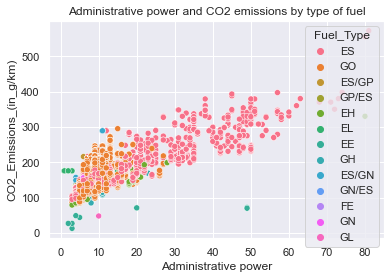

In [49]:
sns.scatterplot(x = 'Administrative_Power', y = 'CO2_Emissions_(in_g/km)', hue = 'Fuel_Type', data = df) 
plt.xlabel("Administrative power")
plt.title("Administrative power and CO2 emissions by type of fuel")

Text(0.5, 1.0, 'Administrative power and CO2 emissions by class')

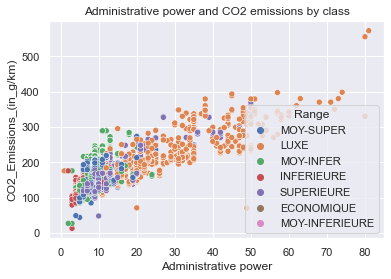

In [50]:
sns.scatterplot(x = 'Administrative_Power', y = 'CO2_Emissions_(in_g/km)', hue = 'Range', data = df) 
plt.xlabel("Administrative power")
plt.title("Administrative power and CO2 emissions by class")

Text(0.5, 1.0, 'Administrative power and CO2 emissions by car body')

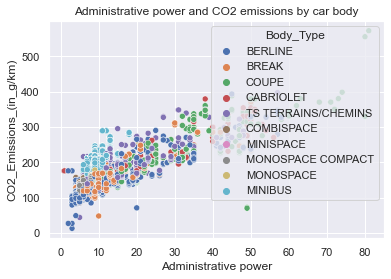

In [51]:
sns.scatterplot(x = 'Administrative_Power', y = 'CO2_Emissions_(in_g/km)', hue = 'Body_Type', data = df) 
plt.xlabel("Administrative power")
plt.title("Administrative power and CO2 emissions by car body")

Text(0.5, 1.0, 'Curb weight (minimum) and CO2 emissions by class')

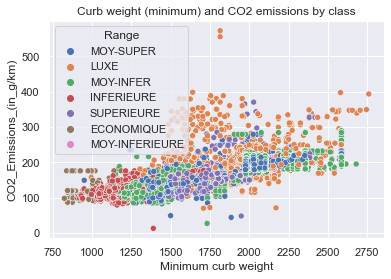

In [52]:
sns.scatterplot(x = 'Minimum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Range', data = df) 
plt.xlabel("Minimum curb weight")
plt.title("Curb weight (minimum) and CO2 emissions by class")

Text(0.5, 1.0, 'Curb weight (minimum) and CO2 emissions by car body')

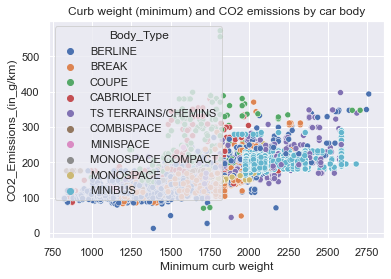

In [53]:
sns.scatterplot(x = 'Minimum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Body_Type', data = df) 
plt.xlabel("Minimum curb weight")
plt.title("Curb weight (minimum) and CO2 emissions by car body")

Text(0.5, 1.0, 'Curb weight (minimum) and CO2 emissions by type of fuel')

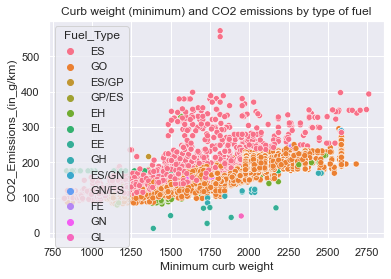

In [54]:
sns.scatterplot(x = 'Minimum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Fuel_Type', data = df) 
plt.xlabel("Minimum curb weight")
plt.title("Curb weight (minimum) and CO2 emissions by type of fuel")

Text(0.5, 1.0, 'Curb weight (minimum) and CO2 emissions by engine type')

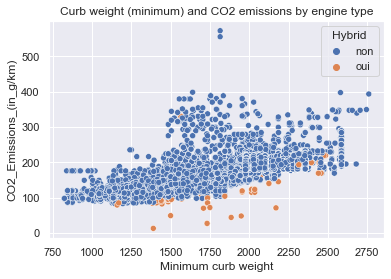

In [55]:
sns.scatterplot(x = 'Minimum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Hybrid', data = df) 
plt.xlabel("Minimum curb weight")
plt.title("Curb weight (minimum) and CO2 emissions by engine type")

Text(0.5, 1.0, 'Curb weight (maximum) and CO2 emissions by collection')

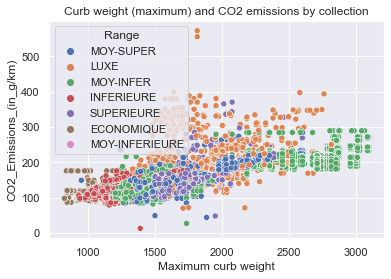

In [56]:
sns.scatterplot(x = 'Maximum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Range', data = df) 
plt.xlabel("Maximum curb weight")
plt.title("Curb weight (maximum) and CO2 emissions by collection")

Text(0.5, 1.0, 'Curb weight (maximum) and CO2 emissions by car body')

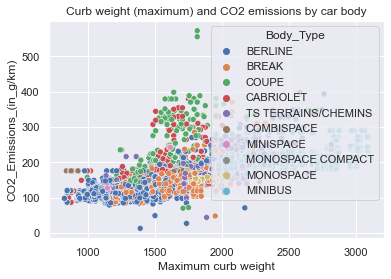

In [57]:
sns.scatterplot(x = 'Maximum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Body_Type', data = df) 
plt.xlabel("Maximum curb weight")
plt.title("Curb weight (maximum) and CO2 emissions by car body")

Text(0.5, 1.0, 'Curb weight (maximum) and CO2 emissions by type of fuel')

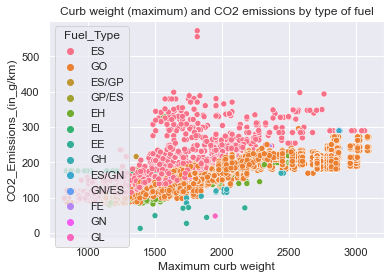

In [58]:
sns.scatterplot(x = 'Maximum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Fuel_Type', data = df) 
plt.xlabel("Maximum curb weight")
plt.title("Curb weight (maximum) and CO2 emissions by type of fuel")

Text(0.5, 1.0, 'Curb weight (maximum) and CO2 emissions by engine type')

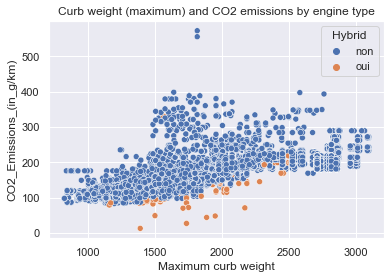

In [59]:
sns.scatterplot(x = 'Maximum_Kerb_Weight', y = 'CO2_Emissions_(in_g/km)', hue = 'Hybrid', data = df) 
plt.xlabel("Maximum curb weight")
plt.title("Curb weight (maximum) and CO2 emissions by engine type")

In [ ]:
Data pre-processing

In [60]:
df = pd.get_dummies(df)

In [61]:
df.head()

,Administrative_Power,Urban_Fuel_Consumption_(in_l/100km),Extra-urban_Fuel_Consumption_(in_l/100km),Mixed_Fuel_Consumption_(in_l/100km),CO2_Emissions_(in_g/km),Minimum_Kerb_Weight,Maximum_Kerb_Weight,Brand_ALFA-ROMEO,Brand_ASTON MARTIN,Brand_AUDI,...,Body_Type_MONOSPACE,Body_Type_MONOSPACE COMPACT,Body_Type_TS TERRAINS/CHEMINS,Range_ECONOMIQUE,Range_INFERIEURE,Range_LUXE,Range_MOY-INFER,Range_MOY-INFERIEURE,Range_MOY-SUPER,Range_SUPERIEURE
0,12,11.3,5.8,7.8,182.0,1505,1505,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,12,11.5,6.0,8.0,186.0,1555,1555,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,7,6.6,4.2,5.1,134.0,1565,1565,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,9,6.9,4.3,5.3,139.0,1565,1565,1,0,0,...,0,0,0,0,0,0,0,0,1,0
6,9,6.6,4.3,5.1,136.0,1565,1565,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [62]:
#Separation of the data into X "Features" (explanatory variables) and y "target" (response variable) 
X = df.drop('CO2_Emissions_(in_g/km)', axis=1) 
y = df['CO2_Emissions_(in_g/km)']

In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
#Splitting of the data into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=123)

In [ ]:
Models to predict CO2 emissions

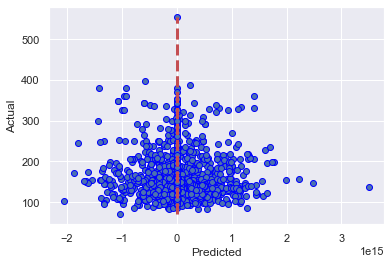

The model performance for testing set
--------------------------------------
MAE is 183941009838525.66
MSE is 1.5238792087616356e+29
R2 score is -5.947043965952839e+25


In [65]:
#Linear Regression 
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
y_pred = linreg.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

In [66]:
print("The results provided suggest that the linear regression model is performing very poorly on the testing set. The MAE and MSE values are extremely high,\n" 
    "and the R2 score is negative, which indicates that the model is performing worse than a model that always predicts the mean of the target variable.\n"
    "This suggests that the linear regression model is not suitable for this particular dataset.")

The results provided suggest that the linear regression model is performing very poorly on the testing set. The MAE and MSE values are extremely high,
and the R2 score is negative, which indicates that the model is performing worse than a model that always predicts the mean of the target variable.
This suggests that the linear regression model is not suitable for this particular dataset.


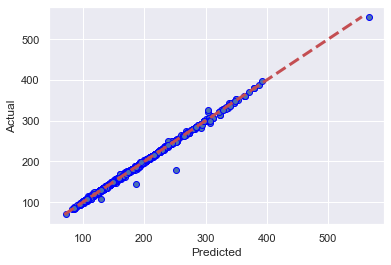

The model performance for testing set
--------------------------------------
MAE is 0.8342301937668831
MSE is 4.9810230794102885
R2 score is 0.9980561213068356


In [67]:
#Gradient Boosting Regressor 
gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000)
gbr.fit(X_train, y_train) 
y_pred = gbr.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

In [68]:
print("The Gradient Boosting Regressor model seems to be performing well on the testing set, as evidenced by the low MAE and MSE values and high R2 score.\n" 
    "This suggests that the model is able to accurately predict CO2 emissions for new data points that it has not seen before.")

The Gradient Boosting Regressor model seems to be performing well on the testing set, as evidenced by the low MAE and MSE values and high R2 score.
This suggests that the model is able to accurately predict CO2 emissions for new data points that it has not seen before.


In [69]:
# Get the coefficients of each feature
coefficients = pd.Series(gbr.feature_importances_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False))

Mixed_Fuel_Consumption_(in_l/100km)                               6.590800e-01
Extra-urban_Fuel_Consumption_(in_l/100km)                         2.908696e-01
Urban_Fuel_Consumption_(in_l/100km)                               2.051870e-02
Fuel_Type_GO                                                      1.693499e-02
Administrative_Power                                              3.905485e-03
                                                                      ...     
Commercial_Designation_E 63 AMG 4MATIC WAGON STATION BVA7         2.369252e-23
Commercial_Designation_FOCUS III 5P 1600 FLEXIFUEL S&S (150ch)    2.369252e-23
Commercial_Designation_SLS AMG CABRIOLET BVA7                     1.184626e-23
Commercial_Designation_NOUVEAU VERSO (150ch) D-CAT BVA6 (7PL)     1.184626e-23
Model_UP!                                                        -1.184626e-23
Length: 1472, dtype: float64


In [1]:
pip install lazypredict

Note: you may need to restart the kernel to use updated packages.Collecting lazypredict
     ---------------------------------------- 1.0/1.0 MB 253.4 kB/s eta 0:00:00
     -------------------------------------- 89.1/89.1 MB 361.3 kB/s eta 0:00:00



In [16]:
from lazypredict.Supervised import LazyRegressor 

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

100%|██████████| 42/42 [2:28:28<00:00, 212.10s/it]   

                                                              Adjusted R-Squared  \
Model                                                                              
Lars                          29154238330783054627565125601818417154823240028...   
RANSACRegressor                                    11763657806938539164696576.00   
TransformedTargetRegressor                          7980633511886511549710336.00   
LinearRegression                                    7980633511886511549710336.00   
SGDRegressor                                            943320848782797701120.00   
KernelRidge                                                                13.67   
GaussianProcessRegressor                                                    6.17   
QuantileRegressor                                                           2.03   
LassoLars                                                                   2.02   
DummyRegressor                                                              

c:\Users\Μαριάνθη\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.567e+03, tolerance: 1.425e+03
  model = cd_fast.enet_coordinate_descent(


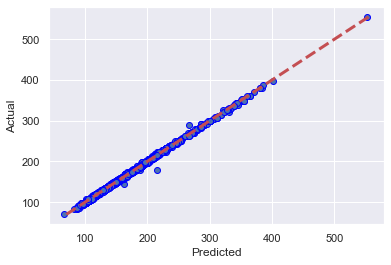

The model performance for testing set
--------------------------------------
MAE is 1.2320603247425663
MSE is 3.510716342603891
R2 score is 0.9986299186758758


In [70]:
#LassoCV Regressor 
lasso = LassoCV(cv=10, random_state=0) 
lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)  

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MAE is {}'.format(mae))
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

In [71]:
# Get the coefficients of each feature
coefficients = pd.Series(lasso.coef_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False))

Mixed_Fuel_Consumption_(in_l/100km)          19.066323
Extra-urban_Fuel_Consumption_(in_l/100km)    16.960207
Urban_Fuel_Consumption_(in_l/100km)          13.906997
Fuel_Type_GO                                  7.223312
Body_Type_MINIBUS                             1.431377
                                               ...    
Fuel_Type_GN                                 -1.674146
Fuel_Type_GN/ES                              -1.705053
Fuel_Type_EE                                 -1.882499
Fuel_Type_FE                                 -2.310636
Fuel_Type_GP/ES                              -2.475789
Length: 498, dtype: float64


In [72]:
print("To transform the problem into a classification problem, we would need to define a threshold value for the CO2 emissions. We can then categorize the\n" 
    'emissions as either "low" or "high" based on whether they are below or above the threshold, respectively. This would turn the problem into a binary\n' 
    "classification problem.\n"
    'For example, we could set a threshold value of 120 g/km, and classify CO2 emissions as "low" if they are below 120 g/km and "high" if they are\n' 
    "120 g/km or above.\n"
    'We would then need to reformat the target variable as a binary variable where 0 represents "low" emissions and 1 represents "high" emissions.\n' 
    "We could then train a binary classification model, such as logistic regression or a support vector machine, to predict whether a vehicle's emissions\n" 
    'will be "low" or "high" based on the input features.')

To transform the problem into a classification problem, we would need to define a threshold value for the CO2 emissions. We can then categorize the
emissions as either "low" or "high" based on whether they are below or above the threshold, respectively. This would turn the problem into a binary
classification problem.
For example, we could set a threshold value of 120 g/km, and classify CO2 emissions as "low" if they are below 120 g/km and "high" if they are
120 g/km or above.
We would then need to reformat the target variable as a binary variable where 0 represents "low" emissions and 1 represents "high" emissions.
We could then train a binary classification model, such as logistic regression or a support vector machine, to predict whether a vehicle's emissions
will be "low" or "high" based on the input features.


In [73]:
# Transform the problem into a binary classification problem
threshold = 200
y_class = np.where(y > threshold, 1, 0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.3, random_state=123)

# Standardize the input variables
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#In this code, we first define a threshold of 200 g/km and use numpy's where function to transform the continuous CO2 emissions into binary labels 
#(1 for high emissions, 0 for low emissions). Then, we split the data into training and testing sets and standardize the input variables as before.


c:\Users\Μαριάνθη\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


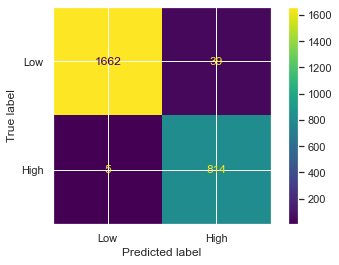

The model performance for testing set
--------------------------------------
Accuracy score: 0.9825396825396825
Precision score: 0.9542790152403282
Recall score: 0.9938949938949939


In [74]:
#We train a logistic regression model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = logreg.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [75]:
print("Based on the above accuracy, precision, and recall scores, the logistic regression model seems to perform well on the classification task.\n" 
      "An accuracy score of 0.98 indicates that the model correctly classified 98% of the instances in the test set, while the precision score of 0.97\n" 
      "suggests that out of all the predicted positive instances, 97% were actually positive. The recall score of 0.99 indicates that out of all the actual\n" 
      "positive instances in the test set, 99% were correctly identified as positive by the model. Overall, these are good evaluation metrics, indicating\n" 
      "that the model is performing well on the classification task.")

Based on the above accuracy, precision, and recall scores, the logistic regression model seems to perform well on the classification task.
An accuracy score of 0.98 indicates that the model correctly classified 98% of the instances in the test set, while the precision score of 0.97
suggests that out of all the predicted positive instances, 97% were actually positive. The recall score of 0.99 indicates that out of all the actual
positive instances in the test set, 99% were correctly identified as positive by the model. Overall, these are good evaluation metrics, indicating
that the model is performing well on the classification task.


In [76]:
# Get the coefficients of each feature
coefficients = pd.Series(logreg.coef_[0], index=X.columns)

# Print the important features (i.e., features with largest coefficients)
print(coefficients.abs().sort_values(ascending=False))

Urban_Fuel_Consumption_(in_l/100km)                                               7.886807
Mixed_Fuel_Consumption_(in_l/100km)                                               7.521290
Extra-urban_Fuel_Consumption_(in_l/100km)                                         7.304609
Administrative_Power                                                              1.248752
Gearbox_Type_and_Number_of_Gears_A 7                                              1.205705
                                                                                    ...   
Commercial_Designation_FOCUS III SW 1600 TDCi S&S (115ch) FAP                     0.000000
Commercial_Designation_TIGUAN 2.0 TDI (110ch) FAP BVM6 BMT                        0.000000
Commercial_Designation_NV400 COMBI 3T5 9 PL 2.3 dCi (100ch) E5b+ ISS BVM6 L2H2    0.000000
Commercial_Designation_CADDY STARTLINE 1.6CR TDI (75ch) FAP                       0.000000
Commercial_Designation_GRAND CHEROKEE (2013) 3.0 L V6 (190ch)                     0.000000

In [ ]:
# Since the dataset is relatively small, we could try different models and compare their performance to choose the best one. 
# However, some common classification models that are worth considering for your dataset are:
# - Random Forest
# - Gradient Boosting
# - Support Vector Machines

# Random Forest and Gradient Boosting are ensemble methods that combine multiple decision trees to improve the model's performance. 
# Random Forest builds multiple decision trees and combines their predictions by taking the average, while Gradient Boosting builds decision trees sequentially, 
# where each subsequent tree tries to correct the errors of the previous tree.

# Support Vector Machines (SVM) are another popular classification algorithm that tries to find the best hyperplane that separates the classes. 
# SVM can also handle non-linear decision boundaries by transforming the features to a higher-dimensional space.


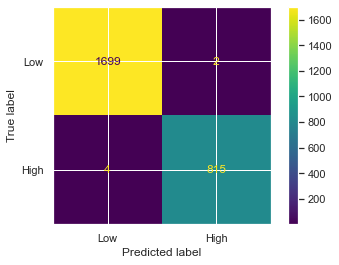

The model performance for testing set
--------------------------------------
Accuracy score: 0.9976190476190476
Precision score: 0.9975520195838433
Recall score: 0.9951159951159951


In [77]:
#We train a Random Forest model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a Random Forest Classifier model
rfclf = RandomForestClassifier()
rfclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = rfclf.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [78]:
print("Those are very good results! It seems like the Random Forest model is performing even better than the Logistic Regression model.\n" 
      "The high accuracy, precision, and recall scores indicate that the model is able to classify the data into the appropriate classes with a\n" 
      "high degree of accuracy.")

Those are very good results! It seems like the Random Forest model is performing even better than the Logistic Regression model.
The high accuracy, precision, and recall scores indicate that the model is able to classify the data into the appropriate classes with a
high degree of accuracy.


In [79]:
# Get the coefficients of each feature
coefficients = pd.Series(rfclf.feature_importances_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False)) 

Mixed_Fuel_Consumption_(in_l/100km)                         1.703764e-01
Urban_Fuel_Consumption_(in_l/100km)                         1.589177e-01
Extra-urban_Fuel_Consumption_(in_l/100km)                   1.470061e-01
Administrative_Power                                        5.558792e-02
Minimum_Kerb_Weight                                         4.298141e-02
                                                                ...     
Commercial_Designation_500 TwinAir 0.9 (85ch) Dualogic      7.223209e-11
Commercial_Designation_C 250 CDI COUPE BVM6 FAP             4.379154e-11
Commercial_Model_MERIVA                                     4.318337e-11
Model_I 20                                                  4.090308e-11
Commercial_Designation_LAGUNA III EnergydCi (175ch) eco2    3.725205e-11
Length: 2463, dtype: float64


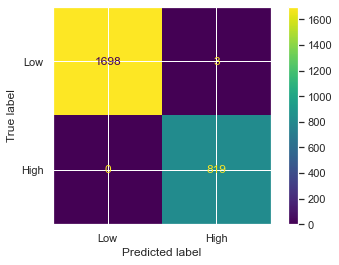

The model performance for testing set
--------------------------------------
Accuracy score: 0.9988095238095238
Precision score: 0.9963503649635036
Recall score: 1.0


In [80]:
#We train a Gradient Boosting model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a Gradient Boosting Classifier model
gbclf = GradientBoostingClassifier()
gbclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = gbclf.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [81]:
print("The results obtained are also good, with high scores for all three metrics, indicating that the model is performing well on the testing data.")

The results obtained are also good, with high scores for all three metrics, indicating that the model is performing well on the testing data.


In [82]:
# Get the coefficients of each feature
coefficients = pd.Series(gbclf.feature_importances_, index=X.columns)

# Print the important features (i.e., features with non-zero coefficients)
print(coefficients[coefficients != 0].sort_values(ascending=False)) 

Mixed_Fuel_Consumption_(in_l/100km)                                                          8.798964e-01
Extra-urban_Fuel_Consumption_(in_l/100km)                                                    6.789187e-02
Maximum_Kerb_Weight                                                                          1.333294e-02
Urban_Fuel_Consumption_(in_l/100km)                                                          9.618564e-03
Model_SPRINTER                                                                               6.104888e-03
Gearbox_Type_and_Number_of_Gears_V 0                                                         3.161292e-03
Hybrid_non                                                                                   2.649906e-03
Minimum_Kerb_Weight                                                                          2.518052e-03
Body_Type_COMBISPACE                                                                         2.062012e-03
Maximum_Power_(in_kW)_225                     

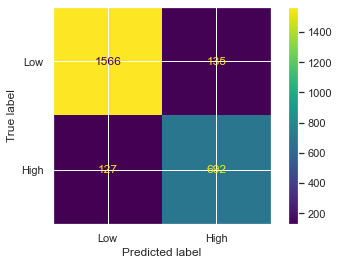

The model performance for testing set
--------------------------------------
Accuracy score: 0.8960317460317461
Precision score: 0.8367593712212817
Recall score: 0.8449328449328449


In [83]:
#We train a Support Vector Machines model using the training data and make predictions on the testing set. 
#Finally, we evaluate the performance of the model using accuracy, precision, and recall scores. 

# Train a Support Vector Machines model
svmclf = svm.SVC()
svmclf.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = svmclf.predict(X_test_scaled)

# Get and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'High'])
cm_display.plot()
plt.show()

# Evaluate the performance of the model 
print("The model performance for testing set")
print("--------------------------------------")
print("Accuracy score:", accuracy_score(y_test, y_pred))
print("Precision score:", precision_score(y_test, y_pred))
print("Recall score:", recall_score(y_test, y_pred))

In [84]:
print("It seems like the performance of the SVM model is not as good as the other models we have tried, especially in terms of accuracy.\n" 
    "However, it is still useful to compare the performance of different models to find the best one for a specific task.")

It seems like the performance of the SVM model is not as good as the other models we have tried, especially in terms of accuracy.
However, it is still useful to compare the performance of different models to find the best one for a specific task.


In [85]:
#We create a new dataframe with the most important columns

df_selected = df[['Urban_Fuel_Consumption_(in_l/100km)', 
                  'Extra-urban_Fuel_Consumption_(in_l/100km)', 
                  'Mixed_Fuel_Consumption_(in_l/100km)', 
                  'Minimum_Kerb_Weight', 
                  'Maximum_Kerb_Weight', 
                  'Administrative_Power', 
                  'CO2_Emissions_(in_g/km)']]

In [86]:
#We can split the data into training and testing sets 

X = df_selected.drop('CO2_Emissions_(in_g/km)', axis=1)
y = df_selected['CO2_Emissions_(in_g/km)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
#We can train our models and evaluate their performance using the MAE, MSE and R^2 score 

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train) 
lr_mae = mean_absolute_error(y_test, lr.predict(X_test)) 
lr_mse = mean_squared_error(y_test, lr.predict(X_test))
lr_r2 = r2_score(y_test, lr.predict(X_test))

#Gradient Boosting Regressor 
gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=5, n_estimators=1000)
gbr.fit(X_train, y_train) 
gbr_mae = mean_absolute_error(y_test, gbr.predict(X_test)) 
gbr_mse = mean_squared_error(y_test, gbr.predict(X_test))
gbr_r2 = r2_score(y_test, gbr.predict(X_test))

#LassoCV Regressor 
lasso = LassoCV(cv=10, random_state=0) 
lasso.fit(X_train, y_train)  
lasso_mae = mean_absolute_error(y_test, lasso.predict(X_test)) 
lasso_mse = mean_squared_error(y_test, lasso.predict(X_test))
lasso_r2 = r2_score(y_test, lasso.predict(X_test))

print("MAE:")
print("Linear Regression : ", lr_mae)  
print("Gradient Boosting Regressor : ", gbr_mae)
print("LassoCV Regressor : ", lasso_mae) 
print("----------------------------------------")
print("MSE:")
print("Linear Regression : ", lr_mse)  
print("Gradient Boosting Regressor : ", gbr_mse)
print("LassoCV Regressor : ", lasso_mse) 
print("----------------------------------------")
print("R^2 Score:") 
print("Linear Regression : ", lr_r2)  
print("Gradient Boosting Regressor : ", gbr_r2)
print("LassoCV Regressor : ", lasso_r2)

MAE:
Linear Regression :  4.783312565812584
Gradient Boosting Regressor :  1.122183866029941
LassoCV Regressor :  10.18193878355066
----------------------------------------
MSE:
Linear Regression :  48.39220353309013
Gradient Boosting Regressor :  8.924846371708158
LassoCV Regressor :  186.66778773093662
----------------------------------------
R^2 Score:
Linear Regression :  0.9804800586813847
Gradient Boosting Regressor :  0.9963999887433463
LassoCV Regressor :  0.9247038986333391


In [88]:
# define a dictionary of hyperparameters and their values to search over
param_grid = {'learning_rate': [0.01, 0.1, 1], 'n_estimators': [100, 500, 1000], 'max_depth': [3, 5, 7]}

# perform a grid search over the hyperparameters using 5-fold cross-validation
grid_search = GridSearchCV(gbr, param_grid, cv=5)

# fit the grid search to the training data
grid_search.fit(X_train, y_train)

# get the best hyperparameters and the corresponding mean cross-validation score
print('Best hyperparameters:', grid_search.best_params_)
print('Best cross-validation score:', grid_search.best_score_)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 1000}
Best cross-validation score: 0.9926030143248203


In [90]:
importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': gbr.feature_importances_})
importance.sort_values(by='Importance', ascending=False, inplace=True)
print(importance) 

                                     Feature  Importance
1  Extra-urban_Fuel_Consumption_(in_l/100km)    0.821981
2        Mixed_Fuel_Consumption_(in_l/100km)    0.128469
0        Urban_Fuel_Consumption_(in_l/100km)    0.030984
4                        Maximum_Kerb_Weight    0.009050
5                       Administrative_Power    0.005862
3                        Minimum_Kerb_Weight    0.003654


In [91]:
print("Based on the feature importance values obtained from the Gradient Boosting Regressor, it seems that the most\n" 
      "important feature for predicting CO2 emissions is the Extra-urban Fuel Consumption (in l/100km), followed by the\n" 
      "Mixed Fuel Consumption (in l/100km), and Urban Fuel Consumption (in l/100km). The other features \n"
      "(Maximum_Kerb_Weight, Administrative_Power, and Minimum_Kerb_Weight) seem to have less importance in predicting\n" 
        "CO2 emissions. So, if we want to reduce CO2 emissions in cars, we could focus on improving the fuel efficiency\n" 
        "of vehicles, especially in extra-urban driving conditions.)")

Based on the feature importance values obtained from the Gradient Boosting Regressor, it seems that the most
important feature for predicting CO2 emissions is the Extra-urban Fuel Consumption (in l/100km), followed by the
Mixed Fuel Consumption (in l/100km), and Urban Fuel Consumption (in l/100km). The other features 
(Maximum_Kerb_Weight, Administrative_Power, and Minimum_Kerb_Weight) seem to have less importance in predicting
CO2 emissions. So, if we want to reduce CO2 emissions in cars, we could focus on improving the fuel efficiency
of vehicles, especially in extra-urban driving conditions.)
